In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Devise

In [3]:
from fastai.conv_learner import *

import warnings
warnings.filterwarnings("ignore")

In [4]:
torch.backends.cudnn.benchmark=True

In [5]:
! pip install git+https://github.com/facebookresearch/fastText.git

  Cloning https://github.com/facebookresearch/fastText.git to /tmp/pip-req-build-npxnr4ug
    100% |████████████████████████████████| 153kB 4.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for fasttext ... error
  Complete output from command /opt/conda/envs/fastai/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-req-build-npxnr4ug/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-wxi52t8q --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/fastText
  copying python/fastText/FastText.py -> build/lib.linux-x86_64-3.6/fastText
  copying python/fastText/__init__.py -> build/lib.linux-x86_64-3.6/fastText
  creating build/lib.linux-x86_64-3.6/fastText/util
  copying python/fastText/util/__init__.py -> build/lib.linux-x86_64-3.6/fastText/util


In [6]:
import fastText as ft

In [7]:
import torchvision.transforms as transforms

In [8]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

tfms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip,
    transforms.ToTensor(),
    normalize
])

In [9]:
fname = 'val/ILSVRC2012_val_00007197.JPEG'

In [10]:
PATH = Path('/fastai/data/ILSVRC/Data/CLS-LOC/')
TMP_PATH = PATH/'tmp'
TRANS_PATH = Path('/fastai/data/translate/')
PATH_TRN = PATH/'train'

In [11]:
img = Image.open(PATH/fname)

In [12]:
import fastai

In [13]:
arch=resnet50
ttfms,vtfms = tfms_from_model(arch, 224, transforms_side_on, max_zoom=1.1) #returns training and validation transforms
def to_array(x,y): return np.array(x).astype(np.float32)/255,None
def TT(x,y): return torch.from_numpy(x), None

ttfms.tfms = [to_array] + ttfms.tfms #+ [TT]

In [14]:
ttfms(img)

array([[[-0.89964, -0.58173, -0.49885, ..., -0.81902, -0.95766, -0.97111],
        [-0.78459, -0.75815, -0.54786, ..., -0.89769, -0.94457, -0.68959],
        [-1.51644, -1.26857, -1.04417, ..., -0.94766, -0.57625, -0.02716],
        ...,
        [-0.6755 , -0.80135, -0.82565, ..., -0.21521, -0.52724, -0.5684 ],
        [-0.19776, -0.47541, -0.5871 , ..., -0.54059,  0.09611, -0.13697],
        [-0.58639, -0.60021, -0.50833, ..., -0.1884 , -0.12398,  0.20226]],

       [[-0.2284 ,  0.05991,  0.27881, ..., -0.7679 , -0.59851, -0.52766],
        [-0.30835, -0.17507,  0.1198 , ..., -0.69194, -0.42117, -0.44452],
        [-1.00805, -0.55614, -0.21589, ..., -0.33364, -0.25187, -0.15665],
        ...,
        [-0.34458, -0.55112, -0.43089, ..., -0.08818, -0.05853,  0.10793],
        [ 0.49342,  0.10252,  0.05855, ..., -0.11029,  0.34202,  0.5054 ],
        [-0.51914, -0.43831,  0.11053, ...,  0.4181 ,  0.21278,  0.44325]],

       [[-1.42077, -1.09578, -1.00653, ..., -1.41484, -1.34399, -1.391

In [15]:
ft_vecs = ft.load_model(str(TRANS_PATH/'wiki.en.bin'))

In [16]:
ft_vecs.get_word_vector('king')

array([ 0.03259, -0.18164, -0.29049, -0.10506, -0.16712, -0.07748, -0.5661 , -0.08622, -0.00216,  0.15366,
        0.12189, -0.14722,  0.01511,  0.07209, -0.02156, -0.20612, -0.02104, -0.01999, -0.15506,  0.00802,
       -0.22746,  0.33518, -0.10629, -0.50318, -0.1582 ,  0.27829,  0.05752, -0.32697,  0.04766,  0.01076,
        0.13972, -0.12445, -0.18989,  0.32969, -0.32513,  0.10958,  0.21962, -0.47215,  0.03422, -0.2207 ,
        0.02177,  0.0832 , -0.04776, -0.48873,  0.05207, -0.15001, -0.19203,  0.06177,  0.15535, -0.05598,
        0.11071,  0.39161, -0.17716,  0.05449,  0.25898, -0.13954,  0.4272 , -0.07273, -0.4714 ,  0.04993,
        0.29526, -0.05319,  0.03451, -0.10583, -0.30137,  0.16372,  0.07541,  0.21018, -0.11459,  0.10976,
        0.04923,  0.17688,  0.45658, -0.59762, -0.0039 ,  0.08866,  0.53103,  0.153  , -0.1673 ,  0.13121,
       -0.05547, -0.03582, -0.34535,  0.09128,  0.03323,  0.45211, -0.16894,  0.21139,  0.24153,  0.51014,
       -0.01474, -0.47179,  0.2235 , 

In [17]:
np.corrcoef(ft_vecs.get_word_vector('king'), ft_vecs.get_word_vector('ruler'))

array([[1.     , 0.52621],
       [0.52621, 1.     ]])

In [18]:
np.corrcoef(ft_vecs.get_word_vector('king'), ft_vecs.get_word_vector('queen'))

array([[1.     , 0.64877],
       [0.64877, 1.     ]])

## Map imagenet classes to word vectors

In [19]:
ft_words = ft_vecs.get_words(include_freq=True)
ft_word_dict = {k:v for k,v in zip(*ft_words)}
ft_words = sorted(ft_word_dict.keys(), key=lambda x: ft_word_dict[x])

len(ft_words)

2519370

In [20]:
from fastai.io import get_data

In [21]:
CLASSES_FN = 'imagenet_class_index.json'
get_data(f'http://files.fast.ai/models/{CLASSES_FN}', str(TMP_PATH/CLASSES_FN))

In [22]:
WORDS_FN = 'classids.txt'
get_data(f'http://files.fast.ai/data/{WORDS_FN}', str(PATH/WORDS_FN))

In [23]:
class_dict = json.load((TMP_PATH/CLASSES_FN).open())
classids_1k =  dict(class_dict.values())
nclass = len(class_dict); nclass

1000

In [24]:
class_dict['0']

['n01440764', 'tench']

In [25]:
classid_lines = (PATH/WORDS_FN).open().readlines()
classid_lines[:5]

['n00001740 entity\n',
 'n00001930 physical_entity\n',
 'n00002137 abstraction\n',
 'n00002452 thing\n',
 'n00002684 object\n']

In [26]:
classids = dict(l.strip().split() for l in classid_lines)
len(classids), len(classids_1k)

(82115, 1000)

In [27]:
lc_vec_d = {w.lower(): ft_vecs.get_word_vector(w) for w in ft_words[-1000000:]}

In [28]:
len(lc_vec_d) # we got the last 1Million words from english word vector

1000000

In [29]:
syn_wv = [(k, lc_vec_d[v.lower()]) for k,v in classids.items()
          if v.lower() in lc_vec_d]

syn_wv_1k = [(k, lc_vec_d[v.lower()]) for k,v in classids_1k.items()
             if v.lower() in lc_vec_d]
syn2wv =  dict(syn_wv)
len(syn2wv)

49469

In [30]:
pickle.dump(syn2wv, (TMP_PATH/'syn2wv.pkl').open('wb'))
pickle.dump(syn_wv_1k, (TMP_PATH/'syn_wv_1k.pkl').open('wb'))

In [31]:
syn2wv = pickle.load((TMP_PATH/'syn2wv.pkl').open('rb'))
syn_wv_1k = pickle.load((TMP_PATH/'syn_wv_1k.pkl').open('rb'))

In [32]:
import xml.etree.ElementTree as ET
ANN_PATH = Path('/fastai/data/ILSVRC/Annotations/CLS-LOC/')

In [33]:
PATH

PosixPath('/fastai/data/ILSVRC/Data/CLS-LOC')

In [34]:
images = []
img_vecs = []

n_trn = 0
for d in (PATH/'train').iterdir():
    if d.name not in syn2wv: continue
    vec = syn2wv[d.name]
    for f in d.iterdir():
        images.append(str(f.relative_to(PATH)))
        img_vecs.append(vec)
        n_trn += 1

n_val = 0
for d in (PATH/'val').iterdir():
    vname = d.name.split('.')[0]
    extract = ET.parse(str(ANN_PATH) + '/val/' + vname +'.xml')
    dname = extract.getroot()[-1][0].text #object-name
    if dname not in syn2wv: continue
    vec = syn2wv[dname]
    images.append(str(d.relative_to(PATH)))
    img_vecs.append(vec)
    n_val += 1
    
n_trn, n_val

(739526, 28700)

Image vectors has number of images X embeddings (300) when stacked

In [35]:
img_vecs = np.stack(img_vecs)
img_vecs.shape

(768226, 300)

In [36]:
pickle.dump(images, (TMP_PATH/'images.pkl').open('wb'))
pickle.dump(img_vecs, (TMP_PATH/'img_vecs.pkl').open('wb'))

In [37]:
images = pickle.load((TMP_PATH/'images.pkl').open('rb'))
img_vecs = pickle.load((TMP_PATH/'img_vecs.pkl').open('rb'))

In [38]:
arch=resnet50

In [39]:
n = len(images); n

768226

In [40]:
n

768226

In [41]:
val_idxs = list(range(n-28650, n))

In [45]:
tfms = tfms_from_model(arch, 224, transforms_side_on, max_zoom=1.1)
md = ImageClassifierData.from_names_and_array(str(PATH), images, img_vecs, val_idxs=val_idxs,
             classes=None, tfms=tfms, continuous=True, bs=256)

In [46]:
x,y = next(iter(md.val_dl))

In [47]:
models = ConvnetBuilder(arch, md.c, is_multi=False, is_reg=True, xtra_fc=[1024], ps=[0.2,0.2])
learn =  ConvLearner(md,models,precompute=True)
learn.opt_fn = partial(optim.Adam, betas=(0.9,0.99))

In [49]:
def cos_loss(inp,targ): return 1 - F.cosine_similarity(inp, targ).mean()

learn.crit = cos_loss

In [50]:
learn.lr_find(start_lr=1e-4, end_lr=1e15)

epoch      trn_loss   val_loss                                 
    0      0.999991   1.0       



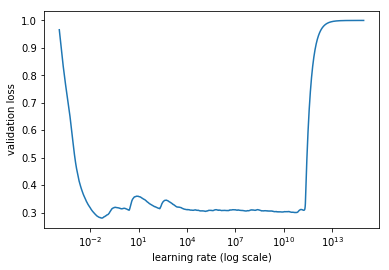

In [51]:
learn.sched.plot()

In [52]:
lr = 1e-2
wd = 1e-7

In [53]:
learn.precompute=True

In [54]:
learn.fit(lr, 1, cycle_len=20, wds=wd, use_clr=(20,10))

epoch      trn_loss   val_loss                                 
    0      0.185063   0.173328  
    1      0.163955   0.157451                                 
    2      0.147469   0.144523                                 
    3      0.142832   0.141348                                 
    4      0.145347   0.139591                                 
    5      0.143198   0.137217                                 
    6      0.146233   0.140197                                 
    7      0.146003   0.140804                                 
    8      0.144522   0.138843                                 
    9      0.144969   0.137658                                 
    10     0.149048   0.140193                                 
    11     0.142032   0.135415                                 
    12     0.141276   0.134611                                 
    13     0.137703   0.133785                                 
    14     0.135107   0.131787                                 
    15 

[0.12583420052786357]

In [55]:
learn.bn_freeze(True)

In [56]:
learn.fit(lr,1, cycle_len=20, wds=wd, use_clr=(20,10))

epoch      trn_loss   val_loss                                 
    0      0.107288   0.124896  
    1      0.113835   0.129012                                 
    2      0.110017   0.126632                                 
    3      0.110615   0.125073                                 
    4      0.109496   0.124981                                 
    5      0.10531    0.12394                                  
    6      0.105489   0.12338                                  
    7      0.102891   0.123934                                 
    8      0.10423    0.123688                                 
    9      0.104199   0.121807                                  
    10     0.10211    0.121826                                  
    11     0.101957   0.121257                                  
    12     0.100654   0.120841                                  
    13     0.100708   0.12164                                   
    14     0.097697   0.120931                                  
 

[0.11864009093655757]

In [57]:
learn.save('pre0')

In [58]:
learn.load('pre0')

## Image search

In [60]:
syns, wvs = list(zip(*syn_wv_1k))
wvs = np.array(wvs)

In [61]:
%time pred_wv = learn.predict()

CPU times: user 3min 22s, sys: 35 s, total: 3min 57s
Wall time: 12.8 s


In [62]:
start=300

In [63]:
denorm = md.val_ds.denorm

def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.axis('off')
    return ax

def show_imgs(ims, cols, figsize=None):
    fig,axes = plt.subplots(len(ims)//cols,cols,figsize=figsize)
    for i,ax in enumerate(axes.flat): show_img(ims[i], ax=ax)
    plt.tight_layout

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


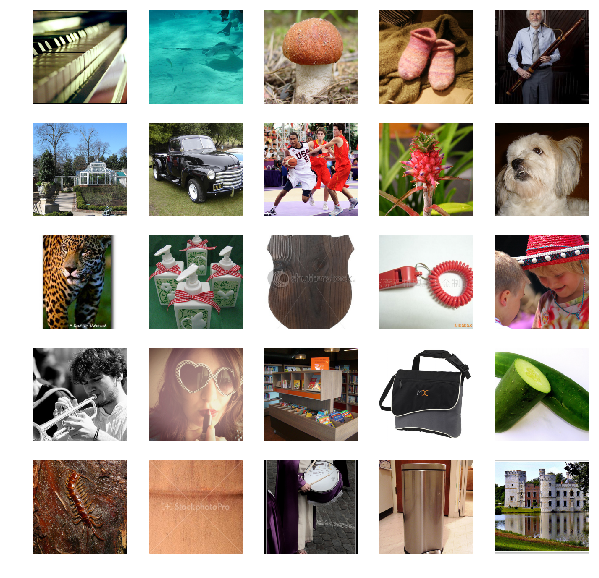

In [64]:
show_imgs(denorm(md.val_ds[start:start+25][0]),5,(10,10))

In [67]:
!pip install nmslib

    100% |████████████████████████████████| 256kB 8.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for nmslib ... done
  Stored in directory: /root/.cache/pip/wheels/c5/ce/c5/ea826b646b40720375cd5fcf3ff893434c041d64eb457b9e6a
Successfully built nmslib
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.4 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [68]:
import nmslib

def create_index(a):
    index = nmslib.init(space='angulardist')
    index.addDataPointBatch(a)
    index.createIndex()
    return index

def get_knns(index, vecs):
    return zip(*index.knnQueryBatch(vecs, k=10, num_threads=4))

def get_knn(index, vec): return index.knnQuery(vec, k=10)

In [69]:
nn_wvs = create_index(wvs)

In [70]:
idxs, dists = get_knns(nn_wvs, pred_wv)

In [71]:
[[classids[syns[id]] for id in ids[:3]] for ids in idxs[start:start+10]]

[['upright', 'banjo', 'accordion'],
 ['stingray', 'hammerhead', 'whiptail'],
 ['bolete', 'agaric', 'mushroom'],
 ['wool', 'mitten', 'Angora'],
 ['bassoon', 'oboe', 'cello'],
 ['greenhouse', 'rapeseed', 'refrigerator'],
 ['pickup', 'minivan', 'jeep'],
 ['basketball', 'volleyball', 'baseball'],
 ['pineapple', 'banana', 'jackfruit'],
 ['Lhasa', 'stupa', 'monastery']]

## Search all wordnet noun classes

In [72]:
all_syns, all_wvs = list(zip(*syn2wv.items()))
all_wvs =  np.array(all_wvs)

In [73]:
nn_allwvs = create_index(all_wvs)

In [74]:
idxs, dist = get_knns(nn_allwvs, pred_wv)

In [75]:
[[classids[all_syns[id]] for id in ids[:3]] for ids in idxs[start:start+10]]

[['upright', 'upright', 'tall'],
 ['stingray', 'shark', 'shark'],
 ['bolete', 'Boletus', 'Boletellus'],
 ['wool', 'wool', 'wool'],
 ['bassoon', 'oboe', 'clarinet'],
 ['greenhouse', 'methane', 'dioxide'],
 ['pickup', 'pickup', 'pickup'],
 ['basketball', 'basketball', 'volleyball'],
 ['pineapple', 'pineapple', 'banana'],
 ['Lhasa', 'Lhasa', 'Tibet']]

## Text -> image search

In [76]:
nn_predwv = create_index(pred_wv)

In [78]:
en_vecd = pickle.load(open(str(TRANS_PATH)+'/wiki.en.pkl', 'rb'))

In [79]:
vec = en_vecd['boat']

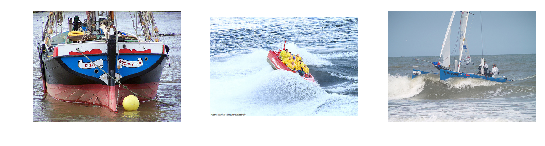

In [82]:
idxs, dist = get_knn(nn_predwv, vec)
show_imgs([open_image(str(PATH)+"/"+md.val_ds.fnames[i]) for i in idxs[:3]], 3, figsize=(9,3))

In [83]:
vec = (en_vecd['engine']+ en_vecd['boat'])/2

In [85]:
idxs, dist = get_knn(nn_predwv, vec)

In [86]:
idxs[0]

7476

In [88]:
str(PATH)+'/'+md.val_ds.fnames[idxs[0]]

'/fastai/data/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00014242.JPEG'

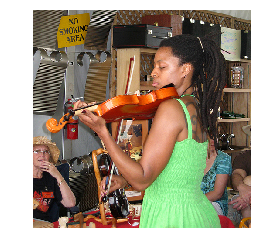

In [103]:
show_img(open_image('/fastai/data/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00011745.JPEG'))

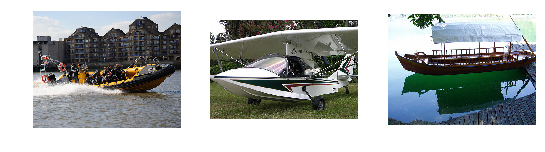

In [89]:
show_imgs([open_image(str(PATH)+'/'+md.val_ds.fnames[i]) for i in idxs[:3]], 3 , figsize=(9,3))

In [90]:
vec = (en_vecd['sail'] + en_vecd['boat'])/2

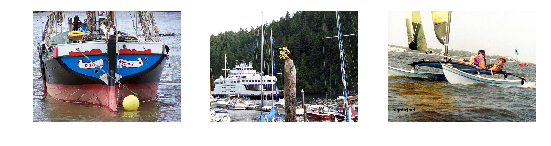

In [92]:
idxs, dist = get_knn(nn_predwv, vec)
show_imgs([open_image(str(PATH)+'/'+md.val_ds.fnames[i]) for i in idxs[:3]], 3 , figsize=(9,3))

## Image -> Image

In [94]:
str(PATH)+'/'+fname

'/fastai/data/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00007197.JPEG'

In [112]:
# img = open_image(str(PATH)+'/'+fname)
img = open_image('/fastai/data/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00024745.JPEG')

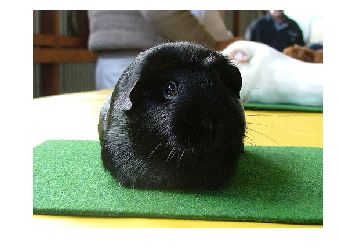

In [113]:
show_img(img)

In [114]:
t_img = md.val_ds.transform(img)
pred = learn.predict_array(t_img[None]) 

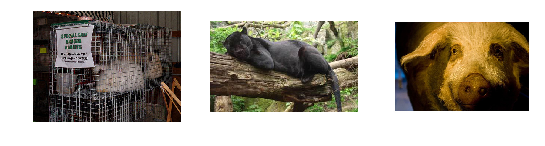

In [115]:
idxs, dist = get_knn(nn_predwv, pred)
show_imgs([open_image(str(PATH)+'/'+md.val_ds.fnames[i]) for i in idxs[1:4]],3, figsize=(9,3))